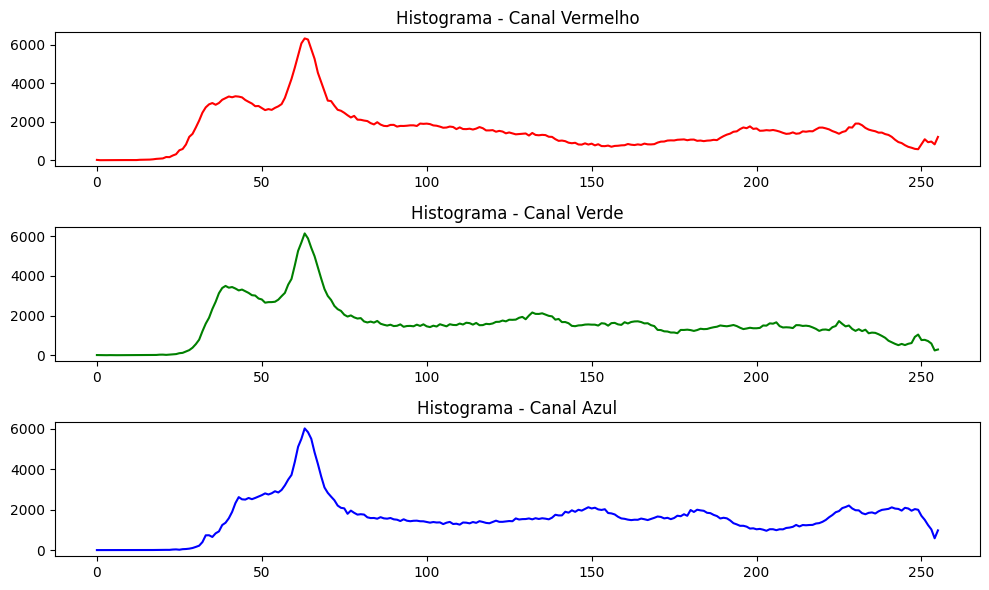

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega uma imagem colorida (substitua 'flower.jpg' pelo caminho da sua imagem)
img = cv2.imread('132623882_2940025776268895_9131617843404056123_n.png')

# Separa os canais de cores (R, G, B)
r, g, b = cv2.split(img)

# Calcula os histogramas para cada canal
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Plotagem dos histogramas
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(hist_r, color='red')
plt.title('Histograma - Canal Vermelho')
plt.subplot(312)
plt.plot(hist_g, color='green')
plt.title('Histograma - Canal Verde')
plt.subplot(313)
plt.plot(hist_b, color='blue')
plt.title('Histograma - Canal Azul')
plt.tight_layout()
plt.show()


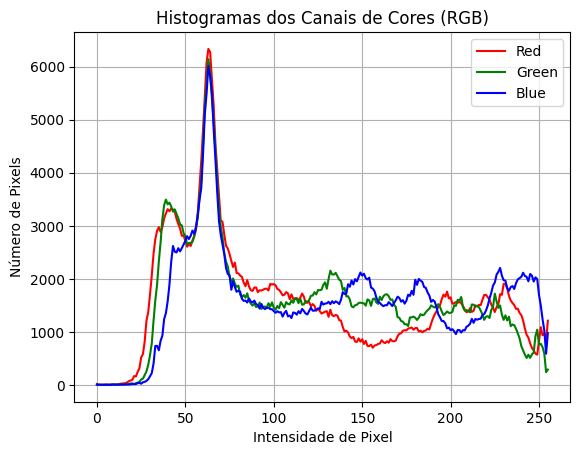

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega uma imagem colorida (substitua 'flower.jpg' pelo caminho da sua imagem)
img = cv2.imread('132623882_2940025776268895_9131617843404056123_n.png')

# Separa os canais de cores (R, G, B)
r, g, b = cv2.split(img)

# Calcula os histogramas para cada canal
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Plotagem dos histogramas sobrepostos
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.title('Histogramas dos Canais de Cores (RGB)')
plt.legend()
plt.grid(True)
plt.show()
